# This dataset is used for Unspervised ML algorithim : KNN

# 1. Read and visualise the data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [9]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
# read the dataset
country_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
# basics of the df
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# 2. Clean the data

In [13]:
# missing values
round(100*(country_df.isnull().sum())/len(country_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [14]:
# drop all rows having missing values
country_df = country_df.dropna()
country_df.shape

(167, 10)

In [15]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Convert % columns to actual values

In [16]:
country_df['exports'] =country_df['exports'] * country_df['gdpp']/100
country_df['imports'] = country_df['imports'] * country_df['gdpp']/100
country_df['health'] = country_df['health'] * country_df['gdpp']/100

In [17]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# 3. Data Visualization

<Figure size 288x288 with 0 Axes>

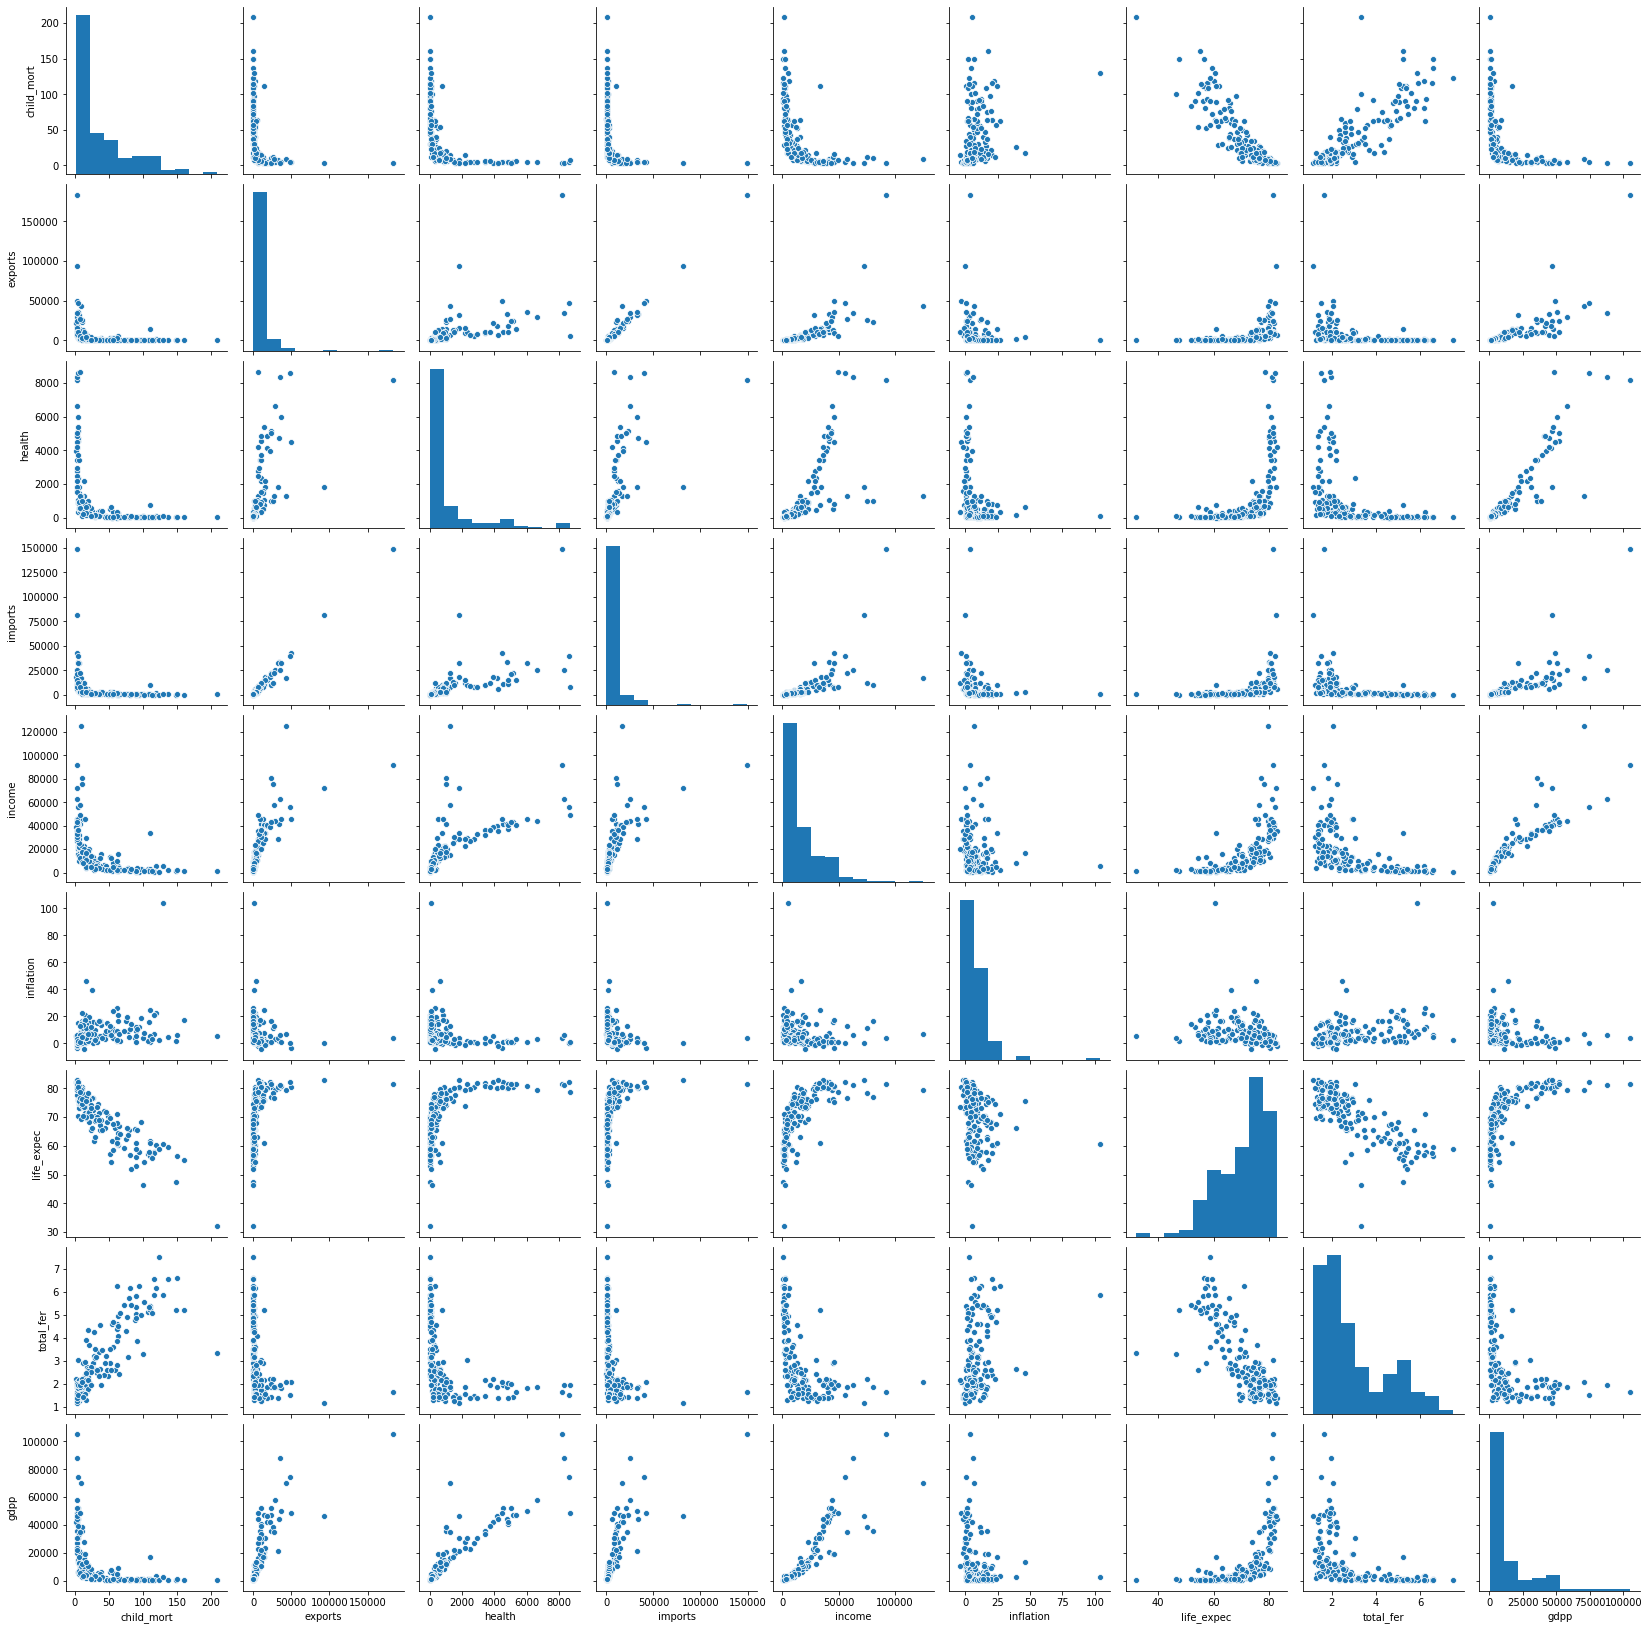

In [18]:
#pairplot of numerical variables
plt.figure(figsize = (4,4))
sns.pairplot(country_df)
plt.show()

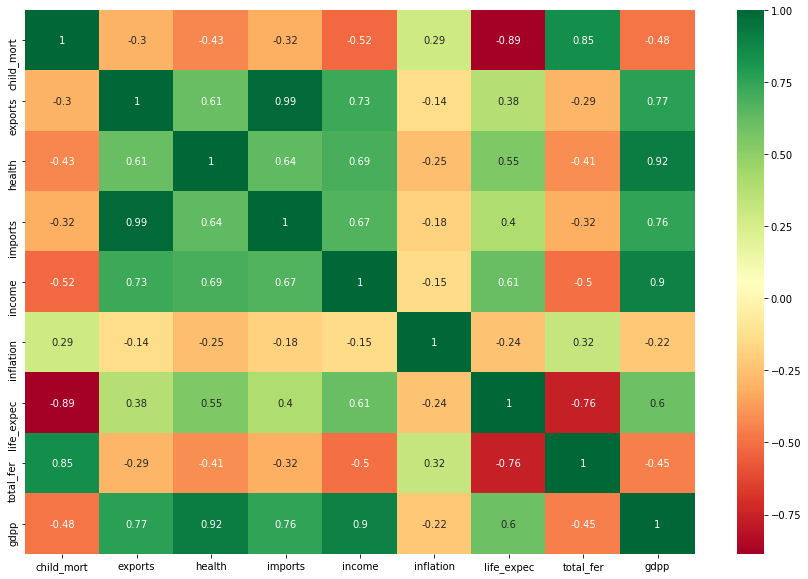

In [19]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (15,10))        
sns.heatmap(country_df.corr(),annot = True,cmap='RdYlGn')
plt.show()

* Child mortality is highly correlated with total fertility with the correlation coefficient of 0.85
*  Imports & exports, health & gdpp, income & gdpp are also well correlated
*  Life expectency has strong negative correlation with total fertility of about -0.76
*  Child mortality is also in strong negative correlation with life expectency

### Income vs Child Mortality

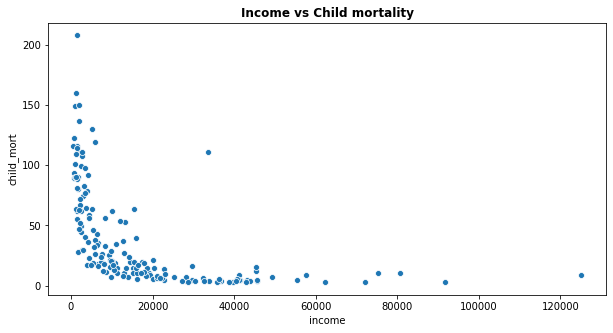

In [20]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='income',y='child_mort', data=country_df)
plt.title('Income vs Child mortality',fontweight="bold")
plt.show()

# 3. Prepare the data for modelling

## Country vs Child Mortality

In [21]:
Country= country_df.groupby('country').child_mort.sum().sort_values(ascending=False)
Country=pd.DataFrame(Country)
Country1=Country.head()
Country2=Country.tail()
display(Country1.head())  
print('*'*50)
display(Country2.tail())

,child_mort
country,
Haiti,208.0
Sierra Leone,160.0
Chad,150.0
Central African Republic,149.0
Mali,137.0


**************************************************


,child_mort
country,
Sweden,3.0
Finland,3.0
Singapore,2.8
Luxembourg,2.8
Iceland,2.6


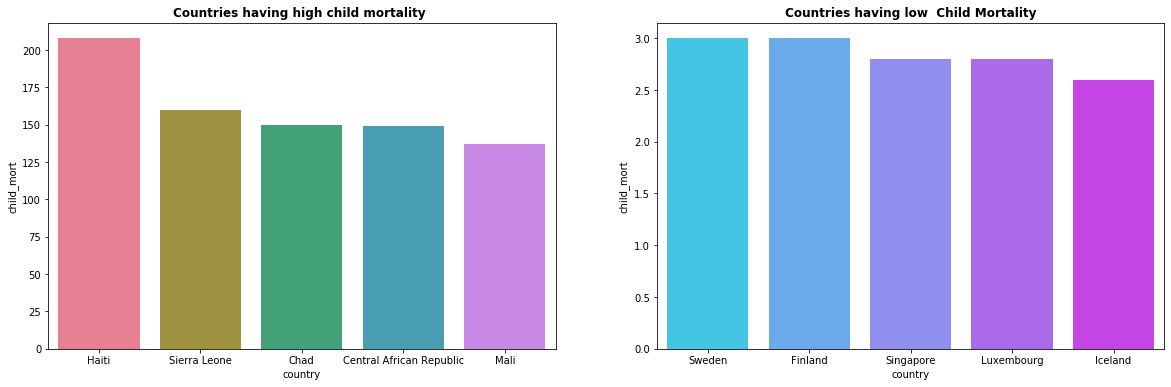

In [22]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(Country1.index, Country1.child_mort, palette='husl')
plt.title('Countries having high child mortality ',fontweight="bold")
plt.subplot(1,2,2)
sns.barplot(Country2.index, Country2.child_mort, palette='cool')
plt.title('Countries having low  Child Mortality',fontweight="bold")
plt.show()

* Haiti is a country with highest child mortality of around 208 out of 1000 live births. Next comes Sierra Leone
* Iceland and Luxembourg are the countries with less child mortality

## Country vs Income

In [23]:
Income= country_df.groupby('country').income.sum().sort_values(ascending=False)
Income=pd.DataFrame(Income)
Income1=Income.head()
Income2=Income.tail()
display(Income1)
print('*'* 50)
display(Income2)

,income
country,
Qatar,125000
Luxembourg,91700
Brunei,80600
Kuwait,75200
Singapore,72100


**************************************************


,income
country,
Central African Republic,888
Niger,814
Burundi,764
Liberia,700
"Congo, Dem. Rep.",609


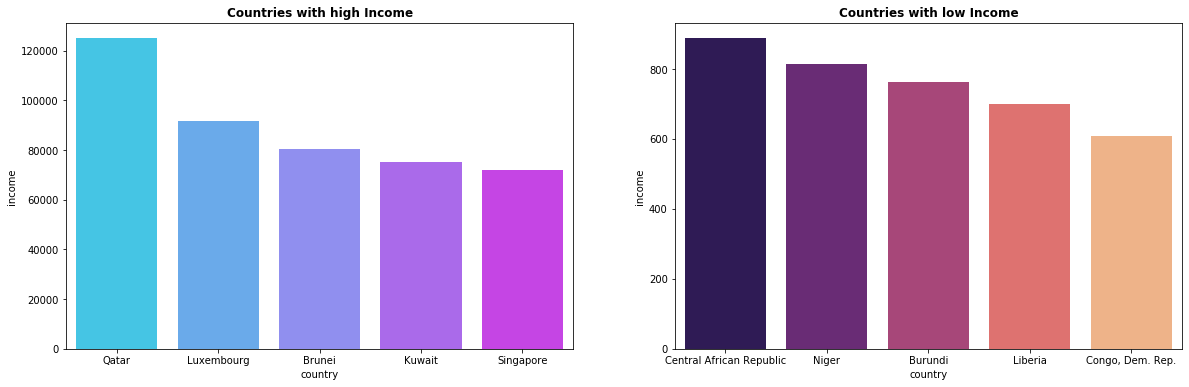

In [24]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(Income1.index, Income1.income, palette='cool')
plt.title('Countries with high Income',fontweight="bold")
plt.subplot(1,2,2)
sns.barplot(Income2.index, Income2.income, palette='magma')
plt.title('Countries with low Income',fontweight="bold")
plt.show()

* Net income per person is more in Qatar which is 125000
* Congo, Democratic Republic and Liberia has less income

## Country vs GDP

In [25]:
GDP= country_df.groupby('country').gdpp.sum().sort_values(ascending=False)
GDP=pd.DataFrame(GDP)
GDP1=GDP.head()
GDP2=GDP.tail()
display(GDP1)
print('*'* 50)
display(GDP2)

,gdpp
country,
Luxembourg,105000
Norway,87800
Switzerland,74600
Qatar,70300
Denmark,58000


**************************************************


,gdpp
country,
Sierra Leone,399
Niger,348
"Congo, Dem. Rep.",334
Liberia,327
Burundi,231


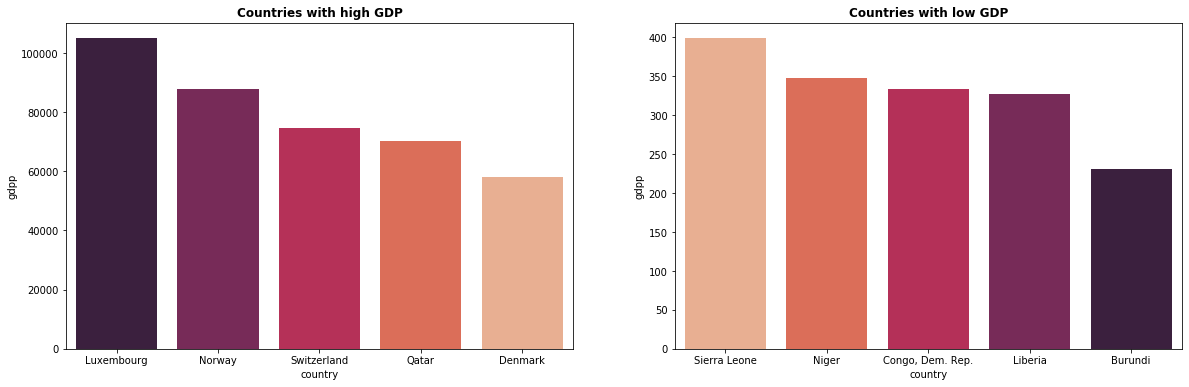

In [26]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(GDP1.index, GDP1.gdpp, palette='rocket')
plt.title('Countries with high GDP',fontweight="bold")
plt.subplot(1,2,2)
sns.barplot(GDP2.index, GDP2.gdpp, palette='rocket_r')
plt.title('Countries with low GDP',fontweight="bold")
plt.show()

* We can see that Luxembourg has high GDP per capita which is around 105000. Then next comess Norway
* Burundi has very less GDP per capita

## Country vs Imports

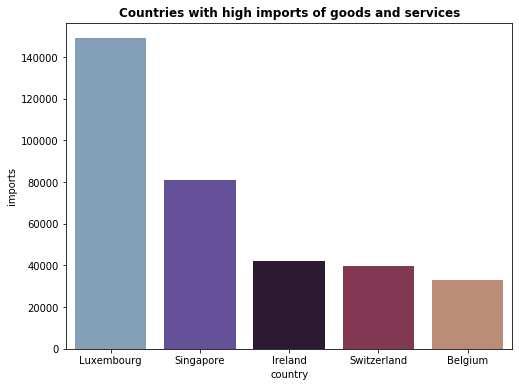

,imports
country,
Luxembourg,149100.0
Singapore,81084.0
Ireland,42125.5
Switzerland,39761.8
Belgium,33166.8


,imports
country,
Burundi,90.552000
Myanmar,0.651092


In [27]:
plt.figure(figsize=(8, 6))
Imports=country_df.groupby('country').imports.sum().sort_values(ascending=False)
Imports= pd.DataFrame(Imports)
Imports1=Imports.head()
sns.barplot(Imports1.index,Imports1.imports, palette='twilight')
plt.title('Countries with high imports of goods and services',fontweight="bold")
plt.show()
display(Imports1)
Imports2=Imports.tail(2)
display(Imports2)

* We can see that Luxembourg has most imports of goods and services of about 149100 per capita
* Myanmar has very less import of goods and servicesof about 0.6511 per capita

## Country vs Life Expectancy

In [28]:
Life_Ex= country_df.sort_values(by=['life_expec'],ascending=True)
Life_Ex.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,460.980,129.8700,1181.700,2380,4.15,46.5,3.30,1170
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446
166,Zambia,83.1,540.200,85.9940,451.140,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,104.652,30.2481,160.191,1030,12.10,53.1,5.31,459


In [29]:
Life_ex=country_df.sort_values(by=['life_expec'],ascending=False)
display(Life_ex[0:5])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,6675.0,4223.05,6052.0,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900


* We can see that Life expectancy is less in Haiti, which means new born child will survive for less number of years
* We already saw above that child mortality is also more in Haiti
* Japan has highest life expectancy

## Country vs Exports

In [30]:
Exports=country_df.sort_values(by=['exports'], ascending= False)
display(Exports[0:5])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.980,79.5,2.07,70300


In [31]:
Export=country_df.sort_values(by=['exports'], ascending= True)
display(Export[0:5])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720,7.04,66.8,2.41,988
26,Burundi,93.6,20.60520,26.7960,90.552000,764,12.30,57.7,6.26,231
50,Eritrea,55.2,23.08780,12.8212,112.306000,1420,11.60,61.7,4.61,482
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.01,47.5,5.21,446
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610,9.44,56.2,5.82,553


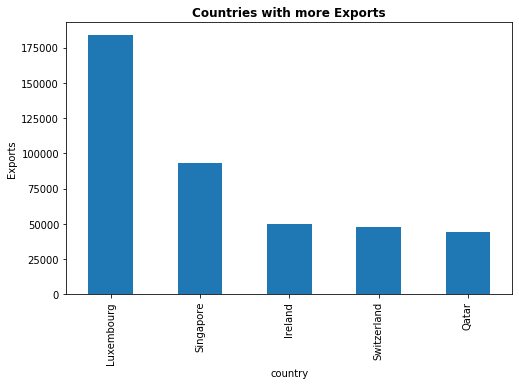

In [32]:
plt.figure(figsize=(8, 5))
country_df.groupby('country').exports.sum().sort_values(ascending=False).head().plot.bar()
plt.ylabel('Exports')
plt.title('Countries with more Exports',fontweight="bold")
plt.show()

* Luxembourg has more export of goods and services of around 183750, due to which that country has the highest GDP per capita
* Myanmar is the country with least exports and next to it is Burundi. Even Imports were less for these countries.

## Country vs Health

In [33]:
Health=country_df.sort_values(by=['health'], ascending= True)
Health[0:5]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
50,Eritrea,55.2,23.08780,12.8212,112.306000,1420,11.60,61.7,4.61,482
93,Madagascar,62.2,103.25000,15.5701,177.590000,1390,8.79,60.8,4.60,413
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.01,47.5,5.21,446
112,Niger,123.0,77.25600,17.9568,170.868000,814,2.55,58.8,7.49,348
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720,7.04,66.8,2.41,988


In [34]:
Health1=country_df.sort_values(by=['health'], ascending= False)
Health1[0:5]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,6001.6,8663.60,7647.2,49400,1.220,78.7,1.93,48400
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000


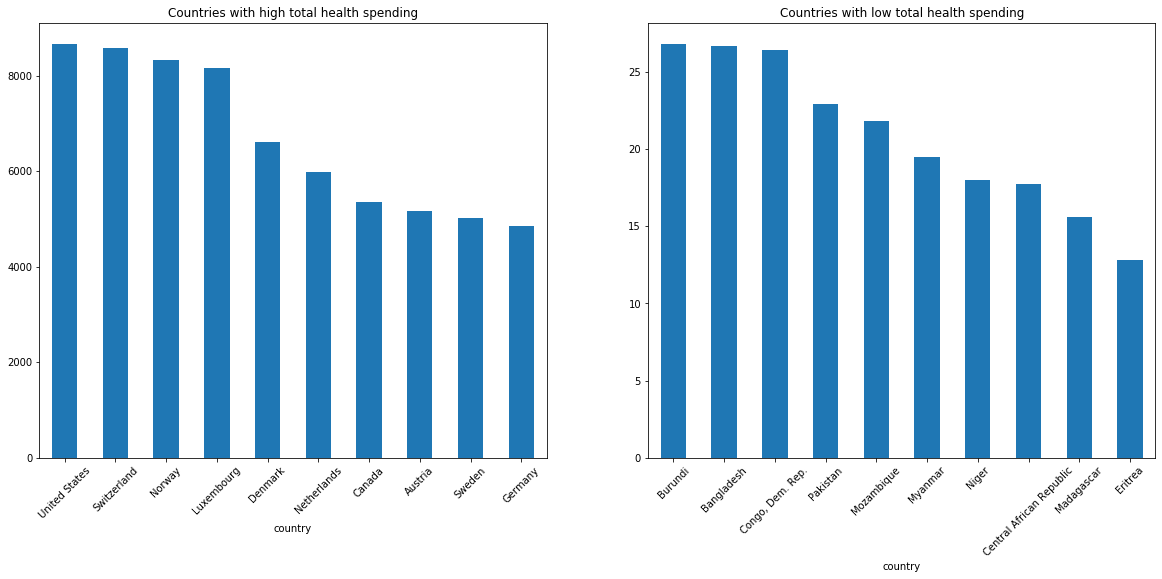

In [35]:
plt.figure(figsize=(20, 8))
He=country_df.groupby('country').health.sum().sort_values(ascending= False)
plt.subplot(1,2,1)
He1=He.head(10).plot.bar()
plt.title('Countries with high total health spending')
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
He2=He.tail(10).plot.bar()
plt.title('Countries with low total health spending')
plt.xticks(rotation = 45)
plt.show()

* United States spends more per person on health than comparable countries which is 8663.
* Eritrea spends less on health

## Country vs Total Fertility

In [36]:
Fertility=country_df.sort_values(by=['total_fer'], ascending= True).head()
Fertility

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,93200.00,1845.36,81084.00,72100,-0.046,82.7,1.15,46600
138,South Korea,4.1,10917.40,1531.53,10210.20,30400,3.160,80.1,1.23,22100
67,Hungary,6.0,10715.80,960.23,10021.50,22300,2.330,74.5,1.25,13100
102,Moldova,17.2,638.96,190.71,1279.55,3910,11.100,69.7,1.27,1630
20,Bosnia and Herzegovina,6.9,1369.17,511.71,2364.93,9720,1.400,76.8,1.31,4610


In [37]:
Fertility1=country_df.sort_values(by=['total_fer'], ascending=False).head()
Fertility1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.39,56.5,6.59,897
97,Mali,137.0,161.4240,35.2584,248.508,1870,4.37,59.5,6.55,708
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231


In [38]:
country_df.total_fer.max()

7.49

In [39]:
country_df.life_expec.max()

82.8

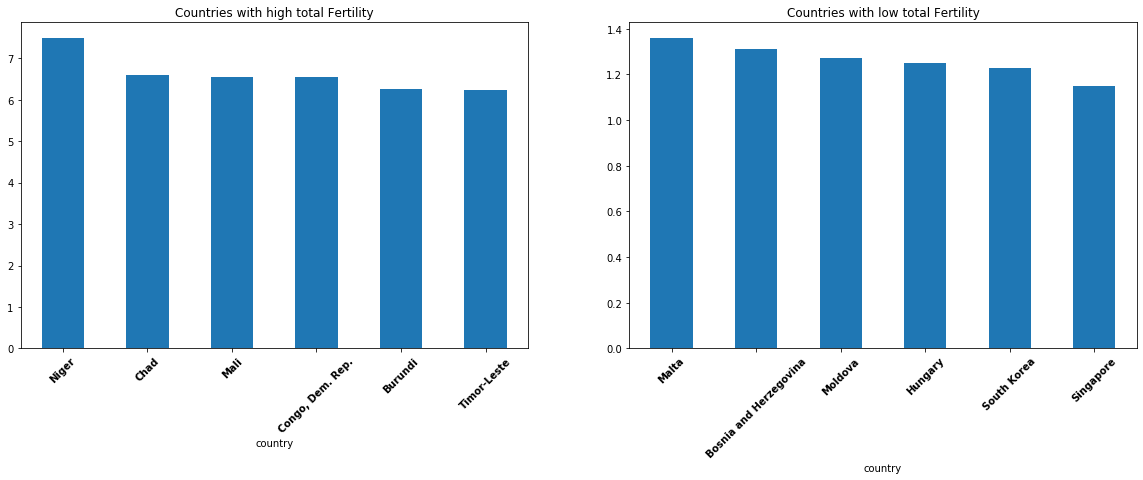

In [40]:
plt.figure(figsize=(20, 6))
Fe=country_df.groupby('country').total_fer.sum().sort_values(ascending= False)
plt.subplot(1,2,1)
Fe1=Fe.head(6).plot.bar()
plt.title('Countries with high total Fertility')
plt.xticks(rotation = 45,fontweight="bold")
plt.subplot(1,2,2)
Fe2=Fe.tail(6).plot.bar()
plt.title('Countries with low total Fertility')
plt.xticks(rotation = 45,fontweight="bold")
plt.show()

* Less number of children born to each woman,can survive more, As we see Singapore, South Korea have more life expectancy and less total fertility.
* Chad, Mali and Congo Dem Republic have very high fertility and child morality

## Country vs Inflation

In [41]:
In=country_df.sort_values(by=['inflation'], ascending=False).head()
In

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,3847.50,662.850,2376.00,16500,45.9,75.4,2.47,13500
103,Mongolia,26.1,1237.55,144.160,1502.55,7710,39.2,66.2,2.64,2650
149,Timor-Leste,62.6,79.20,328.320,1000.80,1850,26.5,71.1,6.23,3600
49,Equatorial Guinea,111.0,14671.80,766.080,10071.90,33700,24.9,60.9,5.21,17100


In [42]:
In=country_df.sort_values(by=['inflation'], ascending=True).head()
In

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
131,Seychelles,14.4,10130.4,367.20,11664.0,20400,-4.210,73.4,2.17,10800
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
77,Japan,3.2,6675.0,4223.05,6052.0,35800,-1.900,82.8,1.39,44500
43,Czech Republic,3.4,13068.0,1560.24,12454.2,28300,-1.430,77.5,1.51,19800
135,Slovenia,3.2,15046.2,2201.94,14718.6,28700,-0.987,79.5,1.57,23400


* Nigeria is having high inflation rate where as Japan,Ireland has very less Inflation rates

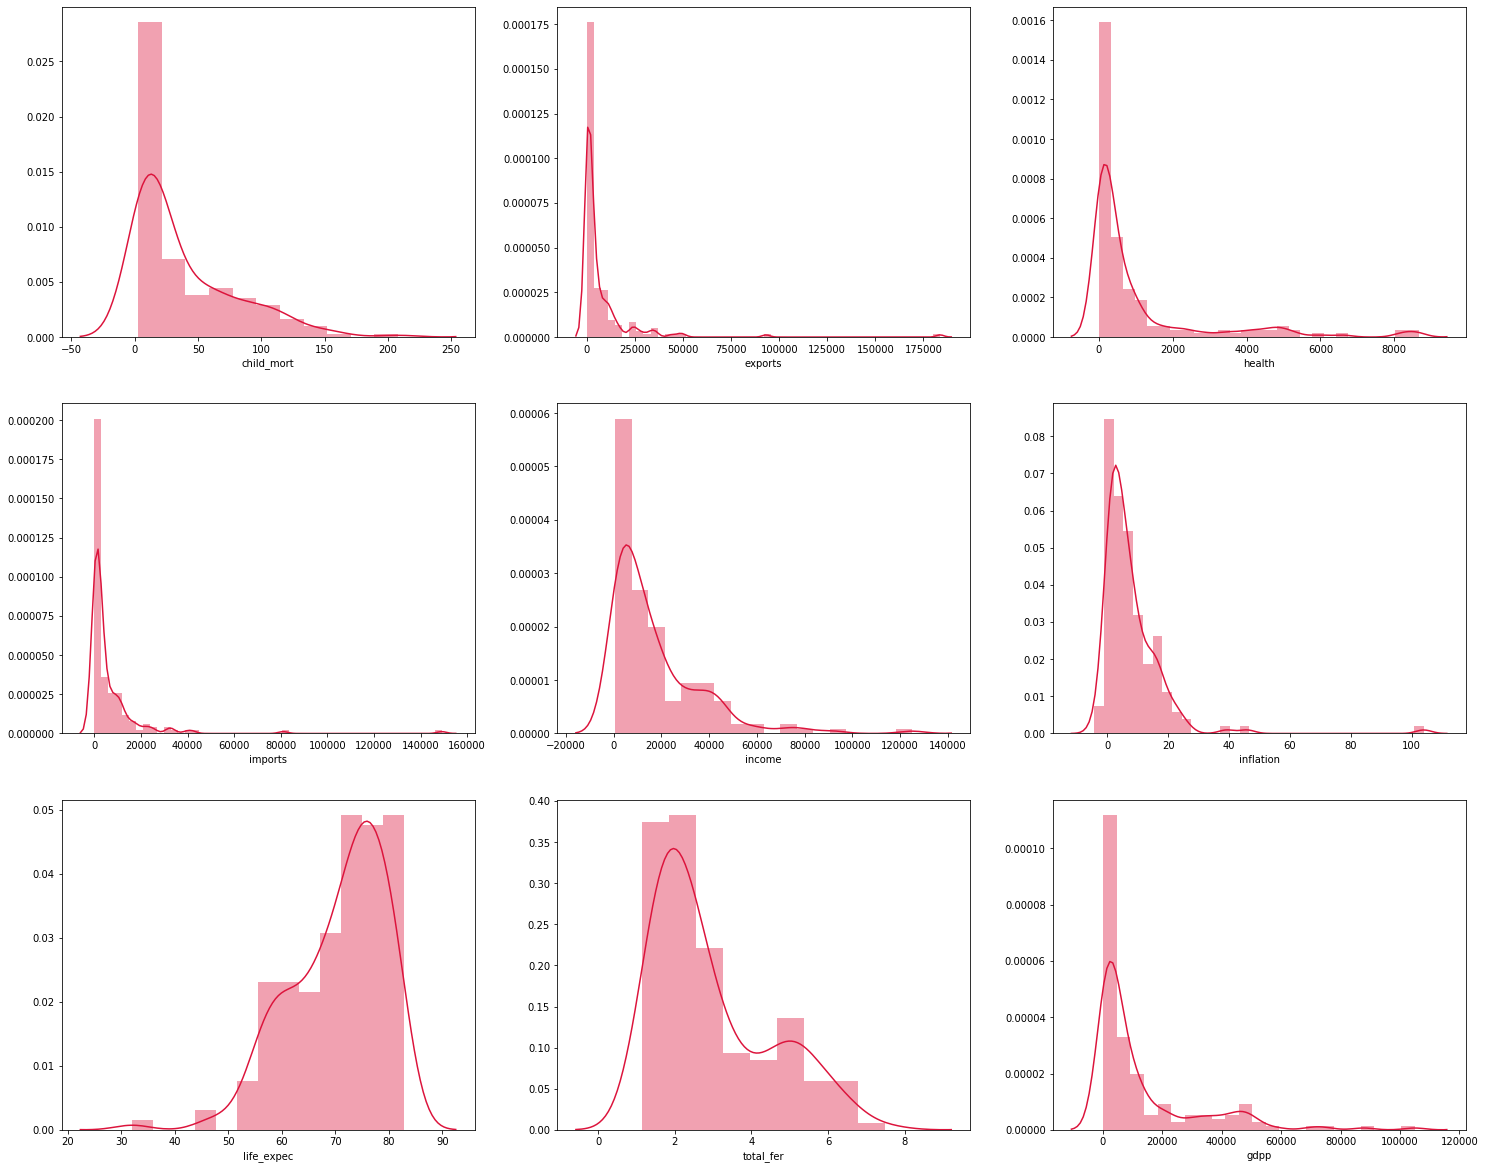

In [43]:
plt.figure(figsize = (20,16))
feature = country_df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(country_df[i[1]], color='crimson')
    plt.subplots_adjust(right=1.1)
    plt.subplots_adjust(top=1.1)

* By looking at the plots we can see that, Child Mortality, Income and GDP are the three columns that have a variation in the data.
* Hence we can consider these three columns for cluster profiling

# 5. Checking outliers

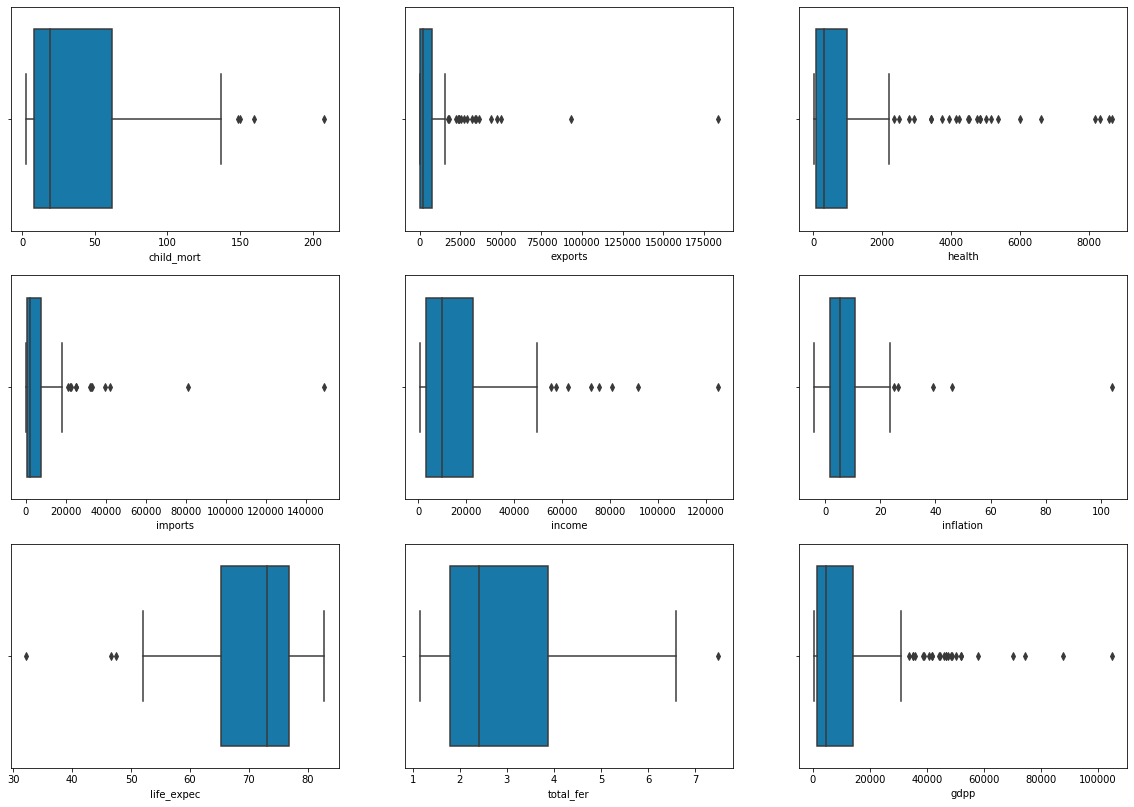

In [44]:
plt.figure(figsize = (20,14))
feature = country_df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(country_df[i[1]],palette='winter')

* There are outliers in the data. we need to treat them as The clustering process is very sensitive to the presence of outliers in the data.

## Outlier Treatment

In [45]:
#outliers before treatment
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [46]:
#Capping
q2 = country_df['imports'].quantile(0.99)
q3 = country_df['health'].quantile(0.99)
q4 = country_df['income'].quantile(0.99)
q5 = country_df['inflation'].quantile(0.99)
q6 = country_df['life_expec'].quantile(0.99)
q7 = country_df['total_fer'].quantile(0.99)
q8 = country_df['gdpp'].quantile(0.99)

country_df['imports'][country_df['imports']>= q2] = q2
country_df['health'][country_df['health']>= q3] = q3
country_df['income'][country_df['income']>= q4] = q4
country_df['inflation'][country_df['inflation']>= q5] = q5
country_df['life_expec'][country_df['life_expec']>= q6] = q6
country_df['total_fer'][country_df['total_fer']>= q7] = q7
country_df['gdpp'][country_df['gdpp']>= q8] = q8

In [47]:
#Outliers after treatment
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1054.206622,5873.135222,16857.550898,7.380970,70.551138,2.942259,12756.826347
std,40.328931,17973.885795,1790.845342,9422.700869,17957.012855,7.793224,8.886987,1.498340,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


# 6. Clustering

## Hopkins check

In [48]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [49]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [50]:
hopkins(country_df.drop('country', axis = 1))

0.9441489007037588

* We can see that the value is between {0.8, ..., 0.99}, so the dataset has a high tendency to cluster.

##  Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(country_df.drop('country', axis = 1))
df1

array([[ 1.29153238, -0.4110113 , -0.56695778, ..., -1.61970522,
         1.92639646, -0.70225949],
       [-0.5389489 , -0.35019096, -0.4403934 , ...,  0.64883094,
        -0.86505432, -0.49872564],
       [-0.27283273, -0.31852577, -0.48627082, ...,  0.67140344,
        -0.03498262, -0.47743428],
       ...,
       [-0.37231541, -0.36146329, -0.54024972, ...,  0.28767096,
        -0.66423052, -0.65869853],
       [ 0.44841668, -0.39216643, -0.55242911, ..., -0.34435902,
         1.15657191, -0.65869853],
       [ 1.11495062, -0.38395214, -0.54227159, ..., -2.09372771,
         1.64524315, -0.6500669 ]])

In [52]:
df1 = pd.DataFrame(df1, columns = country_df.columns[1:])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.538949,-0.350191,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272833,-0.318526,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.007808,-0.291375,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.695634,-0.104331,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


# 7. K-Mean Clustering

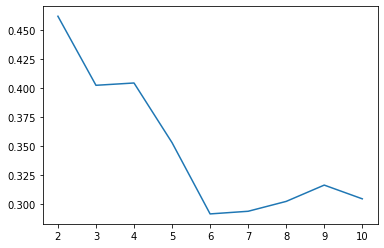

In [53]:
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

plt.show()

* From the plot of silhouette score above, We can see that we have the maximum at 2, and next maximum is at 3. So we can go with 3.

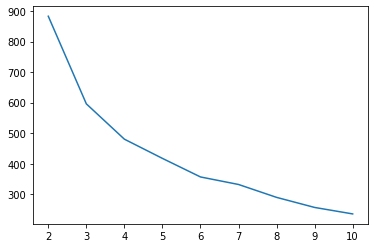

In [54]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.show()

In [55]:
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [56]:
df_kmean = country_df.copy()

In [57]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,2
1,1
2,1
3,2
4,1


In [58]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [59]:
df_kmean.label.value_counts()

1    90
2    48
0    29
Name: label, dtype: int64

* Cluster 1 is having high number of data points compared to other two clusters

# 8. Cluster Profiling

In [60]:
# Making sense out of the clsuters by finding the mean
df2=df_kmean.drop('country', axis = 1).groupby('label').mean()
df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,4.982759,30486.789655,4239.330028,21316.695862,47784.413793,2.876690,80.453103,1.754138,46068.137931
1,20.547778,3477.015539,528.894338,3588.133568,13804.333333,7.110944,73.393333,2.242444,7808.577778
2,91.610417,879.063521,114.821765,827.028771,3897.354167,10.608604,59.239583,4.972233,1909.208333


* Above we can see the cluster centres for the three clusters we got

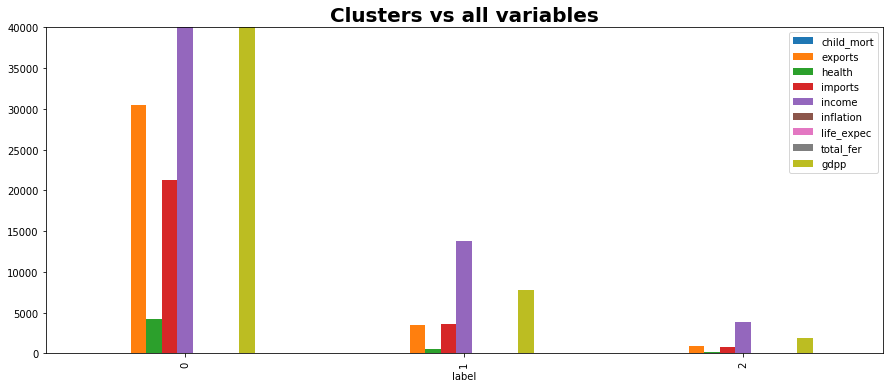

In [61]:
df_kmean.drop('country', axis = 1).groupby('label').mean().plot.bar(figsize=(15,6))
plt.ylim([0,40000])
plt.title("Clusters vs all variables",fontweight="bold", size=20)

plt.show()

* Cluster property is not that clear with all the columns

In [62]:
df_kmean.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'label'],
      dtype='object')

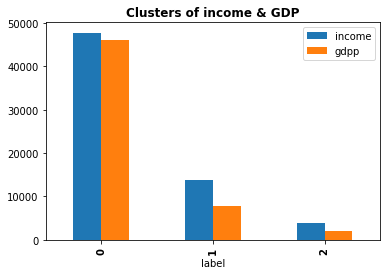

In [63]:
df_kmean.drop(['country', 'exports', 'health', 'imports','child_mort',
       'inflation', 'life_expec', 'total_fer'],axis = 1).groupby('label').mean().plot.bar()
plt.title('Clusters of income & GDP',fontweight="bold")
plt.xticks(fontweight='bold')
plt.show()

* Cluster 0 is having high income and high GDP
* Cluster 2 is having very low income and GDP

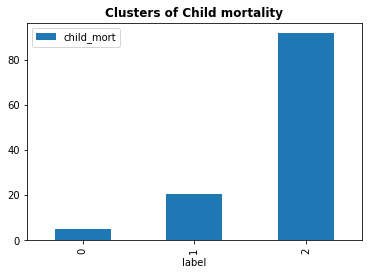

In [64]:
df_kmean.drop(['country', 'exports', 'health', 'imports','income', 'gdpp',
       'inflation', 'life_expec', 'total_fer'],axis = 1).groupby('label').mean().plot.bar()
plt.title('Clusters of Child mortality', fontweight="bold")
plt.show()

* Cluster 0 is having low child mortality
* Cluster 2 is having high child mortality

#### From cluster profiling in K- means clustering we can see that :
*  Cluster 0 is having the High income, High GDP and very Low child mortality
*  Cluster 2 is having very Low income, very Low GDP but High child mortality
*  Cluster 1 is having low income, GDP and less child mortality
#### We saw in cluster profiling that cluster 2 is having low income, low GDP and High Child Mortality
#### So we can say that countries under cluster 2 are in need of aid. Lets see the countries

In [65]:
Kmean=df_kmean[df_kmean['label'] == 2]
Kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2


### Countries we should focus more on:

In [66]:
#Kmean clustering
K=Kmean[['country']]
K= K.reset_index(drop=True)
K

,country
0,Afghanistan
1,Angola
2,Benin
3,Botswana
4,Burkina Faso
5,Burundi
6,Cameroon
7,Central African Republic
8,Chad
9,Comoros


In [67]:
#Sorting based on high child mortality,low income and GDP
final=df_kmean[df_kmean['label'] == 2].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False, True, True])
final.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.450,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.370,59.5,6.5500,708.0,2
113,Nigeria,130.0,589.490,118.1310,405.420,5150.0,41.478,60.5,5.8400,2330.0,2
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,2
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,2


In [68]:
print("Top 10 countries which are in direst need of aid" )
f=final[['country']].head(10)
df_r = f.reset_index(drop=True)
df_r

Top 10 countries which are in direst need of aid


,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


### So from K means clustering, above are the 10 countries which are in direst need of aid

# 9. Hierarchical Clustering

In [69]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.538949,-0.350191,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272833,-0.318526,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.007808,-0.291375,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.695634,-0.104331,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


## Single Linkage

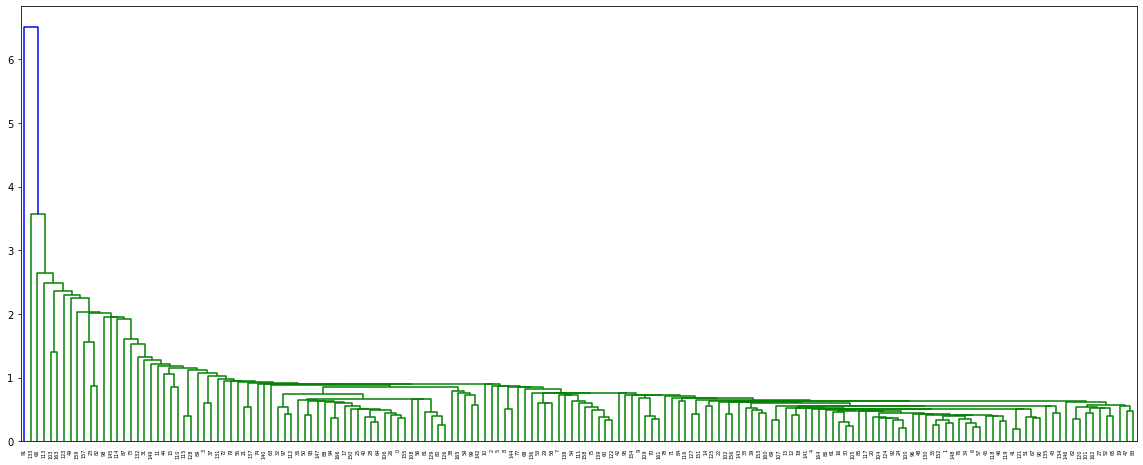

In [70]:
plt.figure(figsize = (20,8))
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### We clearly see, single linkage doesn't produce a good enough result for us to analyse the clusters. Hence, we need to go ahead and utilise the complete linkage method and then analyse the clusters once again.

## Complete Linkage

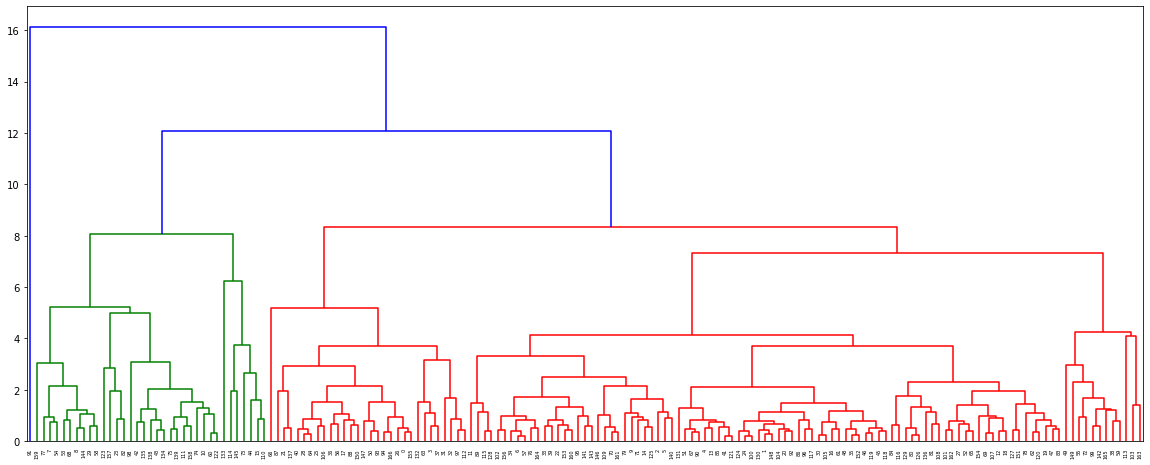

In [71]:
# complete linkage
plt.figure(figsize = (20,8))
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Now we got the clear dendrogram and its easier to analyse the clusters. Lets consider a threshold value of 10. Draw the horizontal line at that height. It cuts 3 vertical lines, all of which represent a cluster.
### So we have 3 clusters now

In [72]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [73]:
# assign cluster labels
df1['cluster_labels'] = cluster_labels
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,1.291532,-0.411011,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259,0
1,-0.538949,-0.350191,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726,0
2,-0.272833,-0.318526,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434,0
3,2.007808,-0.291375,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950,0
4,-0.695634,-0.104331,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042,0


In [74]:
df1.cluster_labels.value_counts()

0    131
1     35
2      1
Name: cluster_labels, dtype: int64

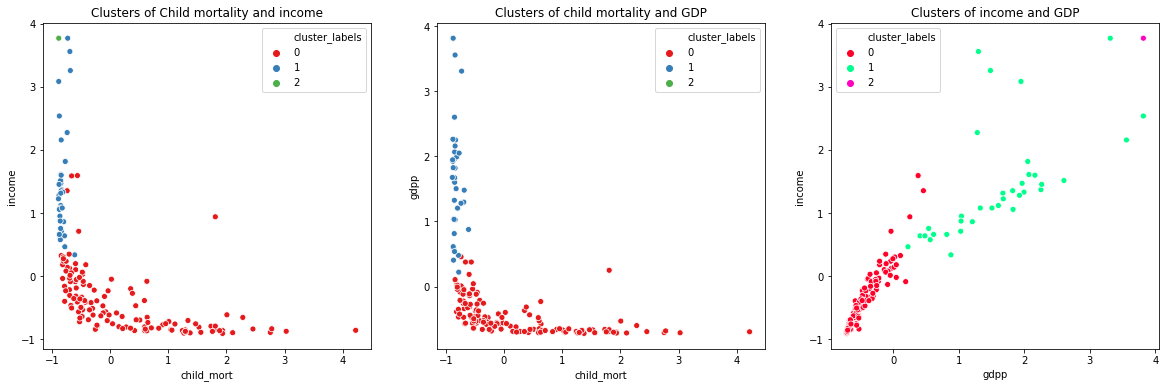

In [75]:
fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='cluster_labels',data=df1, palette='Set1')
plt.title('Clusters of Child mortality and income')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_labels',data=df1, palette='Set1')
plt.title('Clusters of child mortality and GDP')
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels',data=df1,palette='gist_rainbow')
plt.title('Clusters of income and GDP')
plt.show()

* We can see that the clusters formed are not great. Cluster 2 is having only one data point

#### From cluster profiling using hierarchical clustering we can see that :
* 1. Cluster 0 is having the High child mortality, low GDP and very Low child mortality
* 2. Cluster 1 is having Low child mortality, moderate income and GDP
* 3. Cluster 2 is having very low child mortality,high income and GDP

In [76]:
country_df[df1['cluster_labels'] == 0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [77]:
df2=country_df[df1['cluster_labels'] == 0].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False,True, True])
df2.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.450,32.1,3.3300,662.0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.370,59.5,6.5500,708.0
113,Nigeria,130.0,589.490,118.1310,405.420,5150.0,41.478,60.5,5.8400,2330.0
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0


In [78]:
print("5 countries which are in direst need of aid based on hierarchical clustering" )
final_hier=df2[['country']].head()
hier= final_hier.reset_index(drop=True)
hier

5 countries which are in direst need of aid based on hierarchical clustering


,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali


#### So from Hierarchical clustering, above are the five countries which are in direst need of aid

### We have analyzed both K-means and Hierarchical clustering and found clusters formed in both are not identical. 
### The clusters formed in Hierarchical clustering are not great. 
### So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid.

# 10. Final Analysis

#### From K means clustering we got better clusters compared to Hierarchical clustering.
#### Cluster 2 is the better cluster we got with High child mortality, low income and low GDP
#### Final list of country we got are:

In [79]:
Kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2


In [80]:
Kmean=Kmean.sort_values(by=['child_mort','income','gdpp'], ascending=[False,True,True])
Kmean.head()   

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,2


In [81]:
print('10 Countries based on high child mortality, low income and low GDP')
Kmean[['country']].head(10)

10 Countries based on high child mortality, low income and low GDP


,country
66,Haiti
132,Sierra Leone
32,Chad
31,Central African Republic
97,Mali
113,Nigeria
112,Niger
3,Angola
37,"Congo, Dem. Rep."
25,Burkina Faso


#### Lets choose countries based on socio economic and health factors

In [82]:
Kmean.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,91.610417,879.063521,114.821765,827.028771,3897.354167,10.608604,59.239583,4.972233,1909.208333,2.0
std,34.319855,2252.474004,165.518331,1540.981910,5590.168621,8.511174,6.384914,0.995640,2925.911009,0.0
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000,2.0
25%,63.675000,102.873750,34.005875,193.319500,1390.000000,4.080000,56.725000,4.475000,551.500000,2.0
50%,89.750000,196.260000,51.613500,339.306000,1860.000000,8.855000,59.800000,5.055000,932.000000,2.0
75%,111.000000,552.522500,95.303250,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000,2.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,41.478000,71.100000,6.563600,17100.000000,2.0


##### For selected cluster Mean value of child mortality is 91.61. Lets choose the countries more than this mean value as we are looking at high child mortality rates

In [83]:
df_final_list = Kmean[Kmean['child_mort']>91]
df_final_list.shape

(21, 11)

In [84]:
# Let's check the demographic of the resultant data again

df_final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,121.704762,1010.792248,83.584857,850.461429,3639.190476,11.214429,56.547619,5.386533,1708.190476,2.0
std,27.164489,3164.988809,159.534694,2143.001506,7039.657972,10.199533,7.401798,0.966908,3607.677295,0.0
min,92.100000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000,2.0
25%,108.000000,101.286000,26.796000,170.868000,1190.000000,4.150000,55.600000,5.110000,446.000000,2.0
50%,114.000000,161.424000,40.634100,279.936000,1820.000000,6.810000,57.700000,5.340000,708.000000,2.0
75%,130.000000,460.980000,64.660000,428.314000,2690.000000,17.200000,60.100000,6.160000,1200.000000,2.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,41.478000,68.200000,6.563600,17100.000000,2.0


##### Now Mean value of income is 3639. Lets choose the countries less than this mean value.

In [85]:
df_final_list1 = df_final_list[df_final_list['income']<3639]
df_final_list1.shape

(17, 11)

In [86]:
# Let's check the demographic of the resultant data again

df_final_list1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,123.747059,213.279835,43.975647,333.308235,1611.352941,7.989706,55.335294,5.415129,698.352941,2.0
std,29.176320,187.106274,26.677977,274.763937,781.538942,6.497282,7.693174,0.983881,345.567638,0.0
min,93.600000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000,2.0
25%,108.000000,81.503000,26.796000,170.200000,918.000000,2.970000,55.000000,5.110000,419.000000,2.0
50%,114.000000,137.274000,38.755000,248.508000,1430.000000,5.450000,57.300000,5.340000,648.000000,2.0
75%,137.000000,290.820000,52.269000,390.195000,1930.000000,12.300000,58.000000,6.260000,897.000000,2.0
max,208.000000,617.320000,129.870000,1181.700000,3320.000000,20.800000,68.200000,6.563600,1310.000000,2.0


##### Now Mean value of GDP is 698. Lets choose the countries less than this mean value.

In [87]:
df_final_list2 = df_final_list1[df_final_list1['gdpp']<698]
df_final_list2.shape

(10, 11)

In [88]:
df_final_list2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.2860,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.81,57.9,5.8700,575.0,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390.0,2.97,55.6,5.0500,547.0,2
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.10,58.0,5.3400,648.0,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2


### Final List of countries which are in need of the aid based on socio-economic factors.

In [89]:
A_countries=df_final_list2['country']
A_countries=A_countries.reset_index(drop=True)
A_countries

0                       Haiti
1                Sierra Leone
2    Central African Republic
3                       Niger
4            Congo, Dem. Rep.
5                Burkina Faso
6               Guinea-Bissau
7                      Guinea
8                  Mozambique
9                     Burundi
Name: country, dtype: object

# Inferences

* From the EDA performed we could see that Income, GDP and child Mortality are the major three variables need to be focused
* In K means clustering we got Cluster 2 is having very Low income, very Low GDP but High child mortality. So we concluded that countries under cluster 2 are in need of aid.
* In Hierarchical clustering we saw that Cluster 0 is having the High child mortality, low GDP and very Low child mortality.
* The clusters formed in Hierarchical clustering were not that good. So we went on to consider cluster formed in K means clustering. And got top five countries with High child mortality,Low GDP and Low income
* Then we looked for the countries based on socio economic factors

In [90]:
print('Top 5 Countries based on K means clustering:')
Kmean[['country']].head()

Top 5 Countries based on K means clustering:


,country
66,Haiti
132,Sierra Leone
32,Chad
31,Central African Republic
97,Mali


In [91]:
print('Countries based on socio economic and health factors:')
A_countries

Countries based on socio economic and health factors:


0                       Haiti
1                Sierra Leone
2    Central African Republic
3                       Niger
4            Congo, Dem. Rep.
5                Burkina Faso
6               Guinea-Bissau
7                      Guinea
8                  Mozambique
9                     Burundi
Name: country, dtype: object

# Recommendations

#### * From the analysis performed, We can see that low income people have high child mortality, so CEO must focus more on low income countries
#### * We could also see Low GDP per capita countries are not having much import and export of goods and services. Those countries also must be focused
#### * There are some countries which spend well on health for the people living in that country. For ex: US. Such countries can be skipped. And focus more on Burundi, Congo, Dem. Rep where the total health spending is too less.
#### * If the total fertility is less the life expectency is more. Haiti is the country having very low life expectancy, and high child mortality. Its good to have less children per woman,so that they could be looked after well.